In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
np.random.seed(329)

We will attempt to fit a model based on data generated from the underlying distribution $y = x^3 - 5x^2 + 6 + \sigma$, where $\sigma \sim \mathcal{N}(0, 10)$.

The inflection point of this distribution is at $(\frac{5}{3}, -\frac{88}{27})$. We will uniformly sample 100 random input points x centered around this point with a range of 14.

In [35]:
X = np.random.uniform(low=-5.333, high=8.667, size=100)
y = X**3 - 5 * X**2 + 6 + np.random.normal(scale=10, size=100)

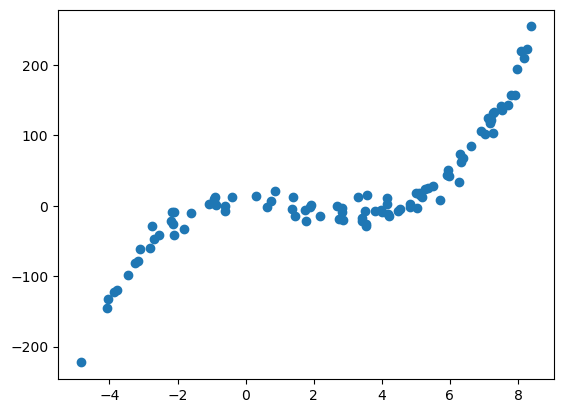

In [37]:
plt.scatter(X, y)
plt.show()

## Experiment 1

We will train a linear regression model using gradient descent to fit the above data. We will split the data into two subsets and train our model sequentially. Our model will have the form $\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$.

Our objective function with be MSE loss, $E(\beta) = \frac{1}{2N}||Y - \phi(x)^T \beta||_2^2$ for $Y \in \mathbb{R}^{N}, \beta \in \mathbb{R}^{4}, \phi(x) \in \mathbb{R}^{(4, N)}$ with $N=100$.

We will use gradient descent with constant step size $\alpha$ so that our gradient descent update will be $\beta_{k+1} = \beta_k - \frac{\alpha}{N} [\phi(x)(\phi(x)^T\beta_k - Y)]$.

Our stopping criterion will be $|E(\beta_k) - E(\beta_{k+1})| < \epsilon$.

### Training Task A
For Task A, we will train on data points x that are less than the inflection point $x=\frac{5}{3}$.

### Training Task B
For Task B, we will take the model trained on task A and perform more gradient descent step updates using only the data points x that are greater than the inflection point $x=\frac{5}{3}$.

### Evaluation

After training on each task, we will evaluate the mean squared error of our model on each subset of the data. We will also evaluate the overall model performance on all of the data after training on both task A and B.

In [134]:
def phi_x(x, M):
    return np.array([x**i for i in range(M+1)])

In [135]:
def loss(beta, phi, y):
    return np.linalg.norm(y - phi.T @ beta)**2 / 2 / y.shape[0]

In [136]:
def train_task(X, y, learning_rate=1e-4, beta_0=np.zeros(4), max_iterations=10000):
    phi = phi_x(X, 3)
    n = y.shape[0]
    
    beta_previous = beta_0
    loss_logs = [loss(beta_previous, phi, y)]
    beta_logs = [beta_previous]
    
    max_iter = max_iterations
    epsilon = 1e-8
    alpha = learning_rate
    
    for k in range(max_iter):
        beta_current = beta_previous - alpha / n * (phi @ (phi.T @ beta_previous - y))
    
        loss_logs.append(loss(beta_current, phi, y))
        beta_logs.append(beta_current)
    
        if abs(loss_logs[-2] - loss_logs[-1]) < epsilon:
            break
    
        beta_previous = beta_current

    return loss_logs, beta_logs

In [137]:
taskA_indices = X <= 5/3
X_A = X[taskA_indices]
y_A = y[taskA_indices]

taskB_indices = X > 5/3
X_B = X[taskB_indices]
y_B = y[taskB_indices]

In [138]:
losses_A, betas_A = train_task(X_A, y_A, learning_rate=1e-3)

In [139]:
betas_A[-1]

array([ 7.60603604, -0.36902998, -4.8852818 ,  1.03560545])

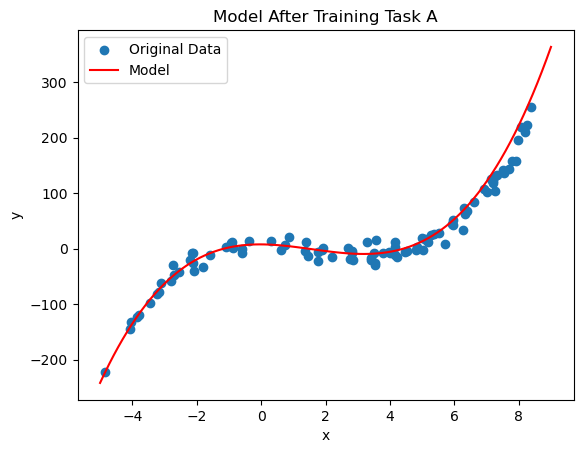

In [140]:
plt.scatter(X, y, label='Original Data')
plt.plot(np.linspace(-5, 9, 100), phi_x(np.linspace(-5, 9, 100), 3).T @ betas_A[-1], label='Model', c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model After Training Task A')
plt.legend()
plt.show()

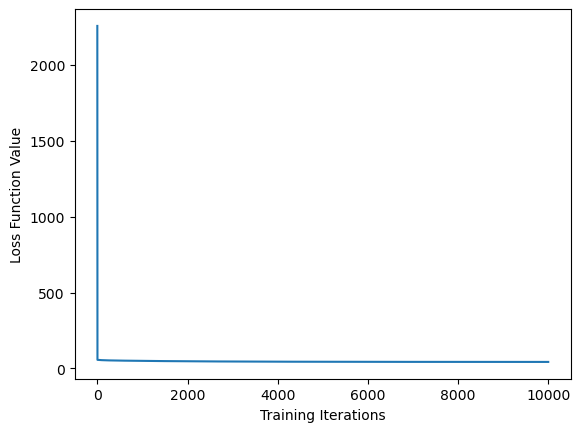

In [141]:
plt.plot(range(len((losses_A))), losses_A)
plt.xlabel('Training Iterations')
plt.ylabel('Loss Function Value')
plt.show()

In [142]:
losses_B, betas_B = train_task(X_B, y_B, learning_rate=1e-6, beta_0 = betas_A[-1])

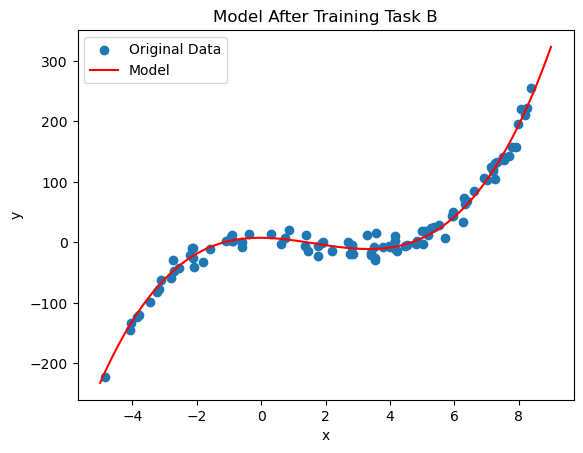

In [143]:
plt.scatter(X, y, label='Original Data')
plt.plot(np.linspace(-5, 9, 100), phi_x(np.linspace(-5, 9, 100), 3).T @ betas_B[-1], label='Model', c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model After Training Task B')
plt.legend()
plt.show()

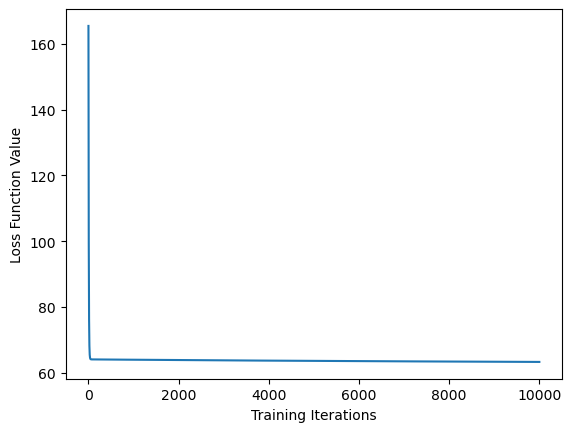

In [144]:
plt.plot(range(len((losses_B))), losses_B)
plt.xlabel('Training Iterations')
plt.ylabel('Loss Function Value')
plt.show()

In [145]:
losses_B, betas_B = train_task(X_B, y_B, learning_rate=1e-5, beta_0 = betas_A[-1])

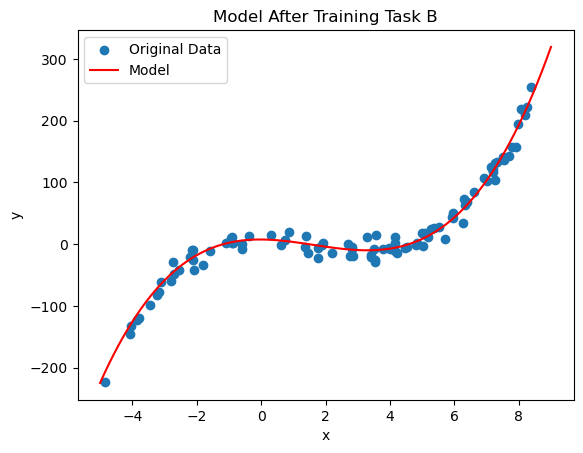

In [146]:
plt.scatter(X, y, label='Original Data')
plt.plot(np.linspace(-5, 9, 100), phi_x(np.linspace(-5, 9, 100), 3).T @ betas_B[-1], label='Model', c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model After Training Task B')
plt.legend()
plt.show()

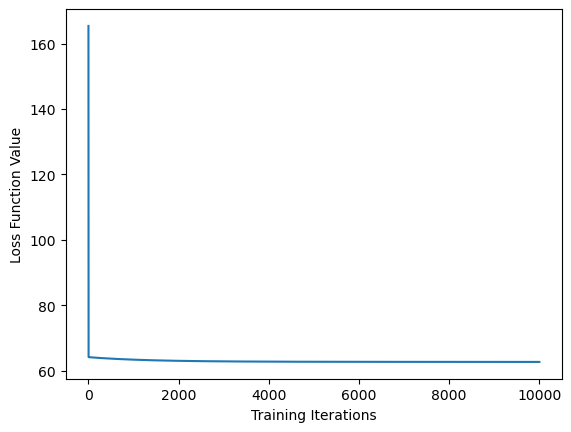

In [147]:
plt.plot(range(len((losses_B))), losses_B)
plt.xlabel('Training Iterations')
plt.ylabel('Loss Function Value')
plt.show()